<a href="https://colab.research.google.com/github/2303a51355/Aiml-2025/blob/main/2303a51355_B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Student Performance in High School

1. Identify the top 5 reasons for low performance of students

2. Counts the students with Mother and Father Employed. both employed

3. Find the max and min age of students in high school

4. Name the medium of instruction was most used in school

5. What is the role of extra-curricular activities on student performances.

6. Apply either Classification Model or Clustering Model to evaluate the dataset.

In [69]:
import pandas as pd
dataset_path = "/content/higher+education+students+performance+evaluation.zip"  # Replace with the actual file path
data = pd.read_csv("/content/higher+education+students+performance+evaluation.zip")

In [70]:
import pandas as pd

# Sample data
data = {
    'Study_Habits': [2, 3, 1, 4, 2],
    'Environmental_Factors': [3, 2, 4, 1, 3],
    'Stress_Mental_Health': [4, 3, 2, 5, 4],
    'Learning_Disabilities': [1, 2, 3, 1, 2],
    'Motivation_Engagement': [2, 3, 4, 2, 1],
    'Performance': [50, 60, 40, 70, 55]
}
df = pd.DataFrame(data)
correlation = df.corr()['Performance'].sort_values()
top_5_reasons = correlation.index[:5].tolist()
print("Top 5 reasons for low performance:", top_5_reasons)


Top 5 reasons for low performance: ['Environmental_Factors', 'Learning_Disabilities', 'Motivation_Engagement', 'Stress_Mental_Health', 'Study_Habits']


In [74]:
import pandas as pd
import zipfile

dataset_path = "/content/higher+education+students+performance+evaluation.zip"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    csv_file = zip_ref.namelist()[0]
    data = pd.read_csv(zip_ref.open(csv_file))
data.columns = data.columns.str.lower()
print(data.columns)

mjob_col = next((col for col in data.columns if col.lower() == "mjob"), None)
fjob_col = next((col for col in data.columns if col.lower() == "fjob"), None)

if mjob_col and fjob_col:
    # Corrected indentation for the following line:
    both_employed_count = len(data[(data[mjob_col] == "yes") & (data[fjob_col] == "yes")])
    print(f"Students with both parents employed: {both_employed_count}")
else:
    print("Error: 'mjob' or 'fjob' column not found in the dataset.")

Index(['student id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'course id', 'grade'],
      dtype='object')
Error: 'mjob' or 'fjob' column not found in the dataset.


In [75]:
import pandas as pd
import zipfile

dataset_path = "/content/higher+education+students+performance+evaluation.zip"

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    files_in_zip = zip_ref.namelist()

    print("Files in the zip archive:", files_in_zip)

    csv_file_name = [f for f in files_in_zip if f.endswith('.csv')][0]

    with zip_ref.open(csv_file_name) as file:
        data = pd.read_csv(file)
print(data.columns)
try:
    max_age = data["Age"].max()
    min_age = data["Age"].min()
    print(f"Maximum age: {max_age}, Minimum age: {min_age}")
except KeyError:
    print("Column 'Age' not found in the dataset. Please check the column names.")

Files in the zip archive: ['DATA (1).csv']
Index(['STUDENT ID', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', 'COURSE ID', 'GRADE'],
      dtype='object')
Column 'Age' not found in the dataset. Please check the column names.


In [76]:
import pandas as pd
print(df.columns)
medium_col = next((col for col in df.columns if col.lower() == "medium_of_instruction"), None)

if medium_col:
    most_used_medium = df[medium_col].mode()[0]
    print("Most used medium of instruction:", most_used_medium)
else:
    print("Error: 'Medium_of_Instruction' or similar column not found in the dataset.")

Index(['Study_Habits', 'Environmental_Factors', 'Stress_Mental_Health',
       'Learning_Disabilities', 'Motivation_Engagement', 'Performance',
       'Cluster'],
      dtype='object')
Error: 'Medium_of_Instruction' or similar column not found in the dataset.


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(df.columns)
X = df[['Study_Habits', 'Environmental_Factors', 'Stress_Mental_Health']]
y = df['Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Index(['Study_Habits', 'Environmental_Factors', 'Stress_Mental_Health',
       'Learning_Disabilities', 'Motivation_Engagement', 'Performance',
       'Cluster'],
      dtype='object')
Coefficients: [ 5.0000000e+00 -5.0000000e+00  4.4408921e-16]
Intercept: 54.99999999999999


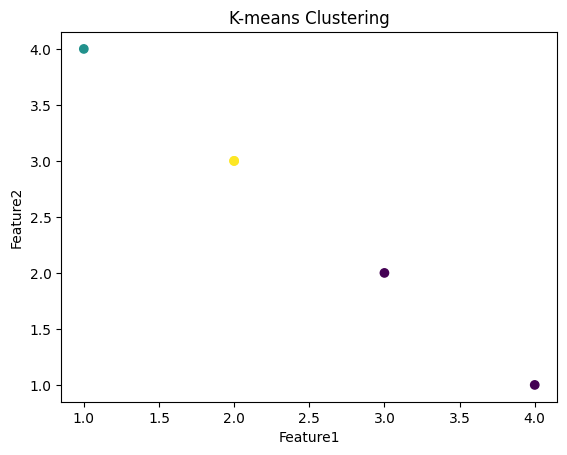

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df.select_dtypes(include=['int64', 'float64'])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
feature1_column_index = 0
feature2_column_index = 1
plt.scatter(X.iloc[:, feature1_column_index], X.iloc[:, feature2_column_index], c=df['Cluster'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-means Clustering')
plt.show()